In [12]:
#library

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#importation des données 
test_df = pd.read_csv('C:/Users/sekou/BigData_7/Data/test.csv')
train_df = pd.read_csv('C:/Users/sekou/BigData_7/Data/train.csv')

In [8]:
#créer une liste des variables numérique
nume = train_df.select_dtypes(include = ['number']).columns
num = train_df[nume]

In [9]:
num2 = num.drop(["MSSubClass","OverallQual","OverallCond","YrSold","MoSold","YearRemodAdd","YearBuilt" ],axis=1)
num2.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,2,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,2,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,3,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,3,836,192,84,0,0,0,0,0,250000


On retire les données numérique qui sont en réalité catégorielle ou des dates

## Matrice de corrélation 

In [14]:
# Matruce de Corrélation
matrice = num2.corr()
matrice

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


<AxesSubplot: >

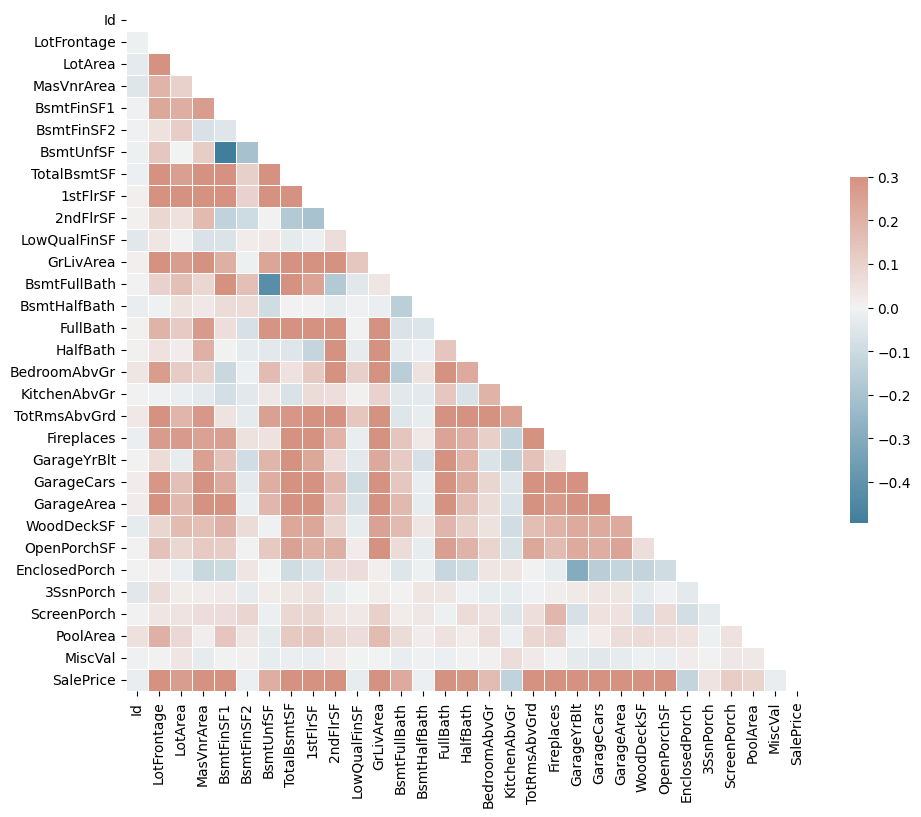

In [15]:
# Matrice de corrélation graphique 
mask = np.triu(np.ones_like(matrice, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(matrice, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [1]:
num.head()

NameError: name 'num' is not defined

In [44]:
repartition1 = num[["BsmtFullBath","BsmtHalfBath","FullBath","GarageCars","Fireplaces","TotRmsAbvGrd","BedroomAbvGr","KitchenAbvGr"]]
repartition1


,BsmtFullBath,BsmtHalfBath,FullBath,GarageCars,Fireplaces,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr
0,1,0,2,2,0,8,3,1
1,0,1,2,2,1,6,3,1
2,1,0,2,2,1,6,3,1
3,1,0,1,3,1,7,3,1
4,1,0,2,3,1,9,4,1
...,...,...,...,...,...,...,...,...
1455,0,0,2,2,1,7,3,1
1456,1,0,2,2,2,7,3,1
1457,0,0,2,1,2,9,4,1
1458,1,0,1,1,0,5,2,1


Graphique des répartitions des variables numérique

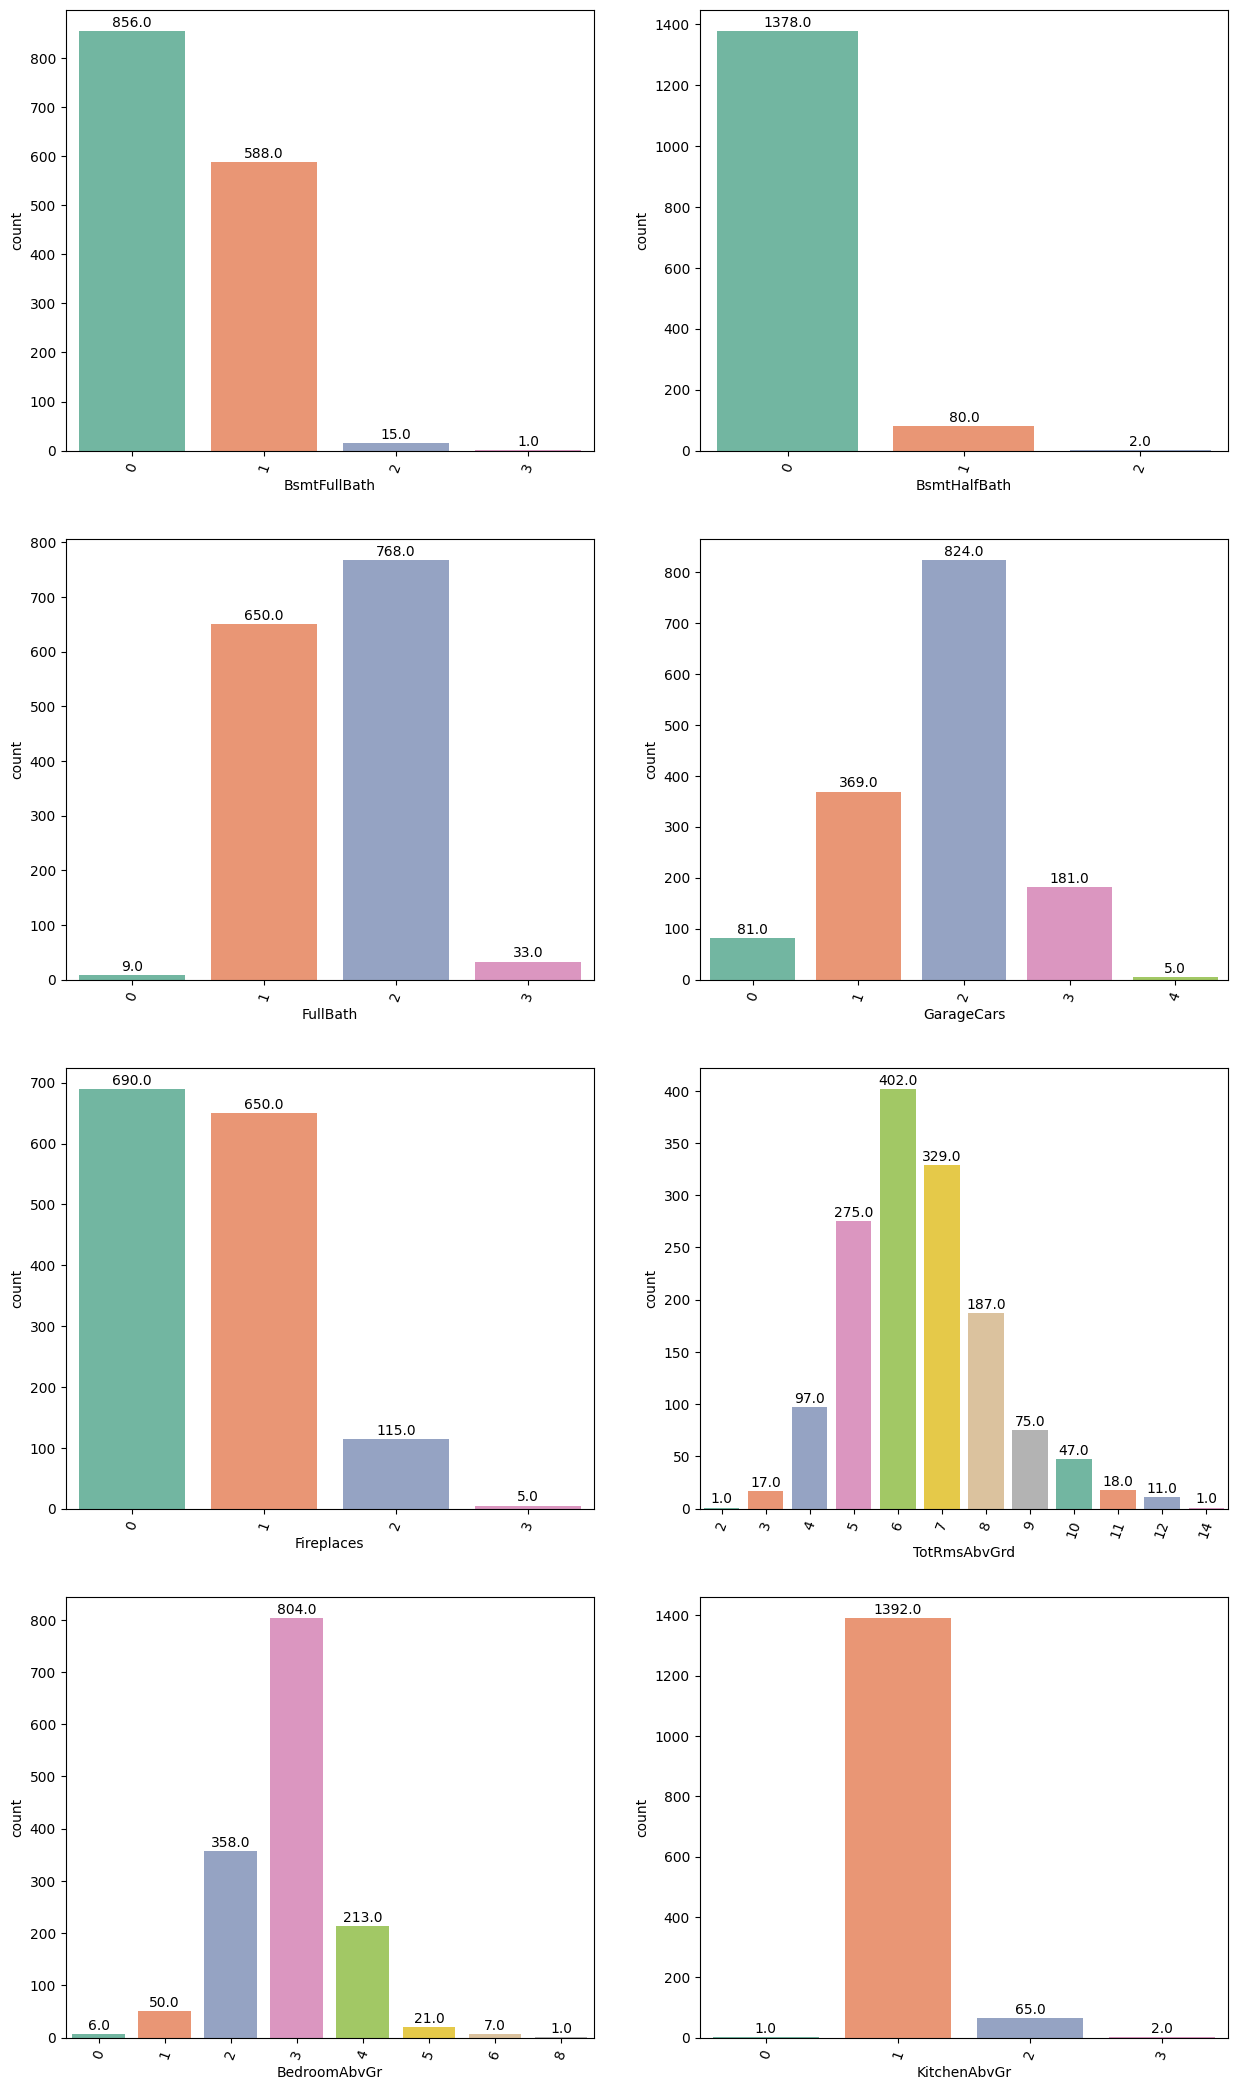

In [76]:
plt.figure(figsize=(15,150))
plotnumber=1
for c in repartition1:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=repartition1[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

c'est répartition nous donnent une première vu sur les variable, on constate 
que certaines modalités ne comportent pas ou très peu d'élements. il conviendrait 
donc par la suite de procéder à des regroupement de certaines modalités afin que 
les répartition soit mieux représenter 

In [46]:
repartition2 = num.drop(["BsmtFullBath","BsmtHalfBath","FullBath","GarageCars","Fireplaces","TotRmsAbvGrd","BedroomAbvGr","KitchenAbvGr"], axis =1)
repartition2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## Création de classe pour les répartition 

In [73]:
#Creéation des classes 

df = repartition2

#saleprice
df['prix'] = pd.cut(df['SalePrice'], 
    bins=[x for x in range(0,500000, 50000)],
    #labels=[x for x in range(50000,400000, 50000)], 
    right=True)

#MSSubClass
df['MSSUBCLASS2'] = pd.cut(df['MSSubClass'], 
    bins=[x for x in range(0,200, 40)],
    #labels=[x for x in range(50000,400000, 50000)], 
    right=True)

#MSSubClass
df['LotFrontage2'] = pd.cut(df['LotFrontage'], 
    bins=[x for x in range(0,320, 50)],
    #labels=[x for x in range(50000,400000, 50000)], 
    right=True)

#LotArea
df['LotArea2'] = pd.cut(df['LotArea'], 
    bins=[x for x in range(1000,220000, 5000)],
    #labels=[x for x in range(50000,400000, 50000)], 
    right=True)


#OverallQual
df['OverallQual2'] = pd.cut(df['OverallQual'], 
    bins=[x for x in range(0,10, 2)],
    #labels=[x for x in range(50000,400000, 50000)], 
    right=True)

#OverallCond
df['OverallCond2'] = pd.cut(df['OverallCond'], 
    bins=[x for x in range(0,10, 2)],
    #labels=[x for x in range(50000,400000, 50000)], 
    right=True)

#YearBuilt
#df['YearBuilt2'] = pd.cut(df['YearBuilt'], 
#    bins=[x for x in range(1870,2010, 30)],
#    right=True)

#MasVnrArea	
#df['MasVnrArea2'] = pd.cut(df['MasVnrArea'], 
#    bins=[x for x in range(0,1600, 500)],
#    right=True)

df2 = df[['OverallCond2','OverallQual2','LotArea2','LotFrontage2','MSSUBCLASS2','prix']]

df2.head()

,OverallCond2,OverallQual2,LotArea2,LotFrontage2,MSSUBCLASS2,prix
0,"(4, 6]","(6, 8]","(6000, 11000]","(50, 100]","(40, 80]","(200000, 250000]"
1,"(6, 8]","(4, 6]","(6000, 11000]","(50, 100]","(0, 40]","(150000, 200000]"
2,"(4, 6]","(6, 8]","(11000, 16000]","(50, 100]","(40, 80]","(200000, 250000]"
3,"(4, 6]","(6, 8]","(6000, 11000]","(50, 100]","(40, 80]","(100000, 150000]"
4,"(4, 6]","(6, 8]","(11000, 16000]","(50, 100]","(40, 80]","(200000, 250000]"


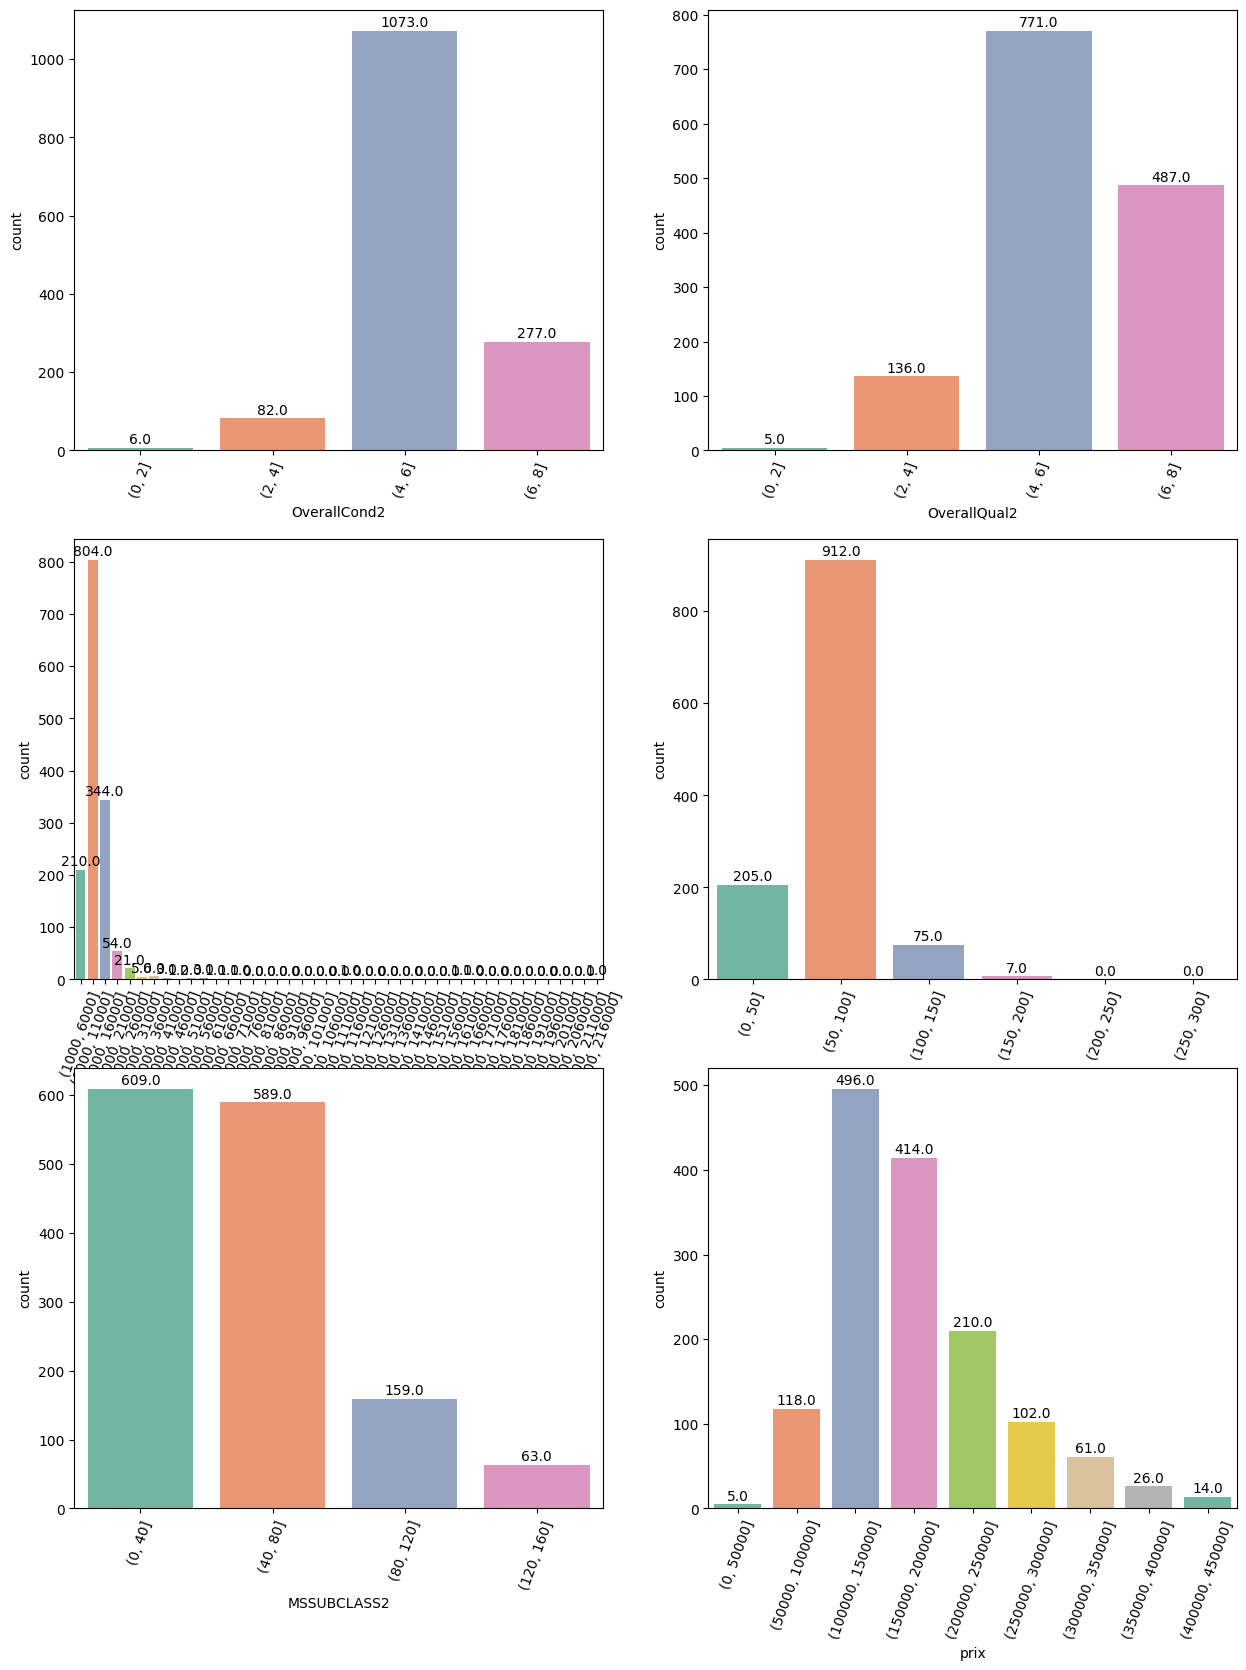

In [75]:
plt.figure(figsize=(15,150))
plotnumber=1
for c in df2:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=df2[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

Afin d'observer les répartition des variable continue, nous avons creer des classes pour que celle ci soit correctement lisible. Nous avons fait le meme constat que la prmière vague de répartition, certaines tranches doivent aussi etre regrouper. Comme nous pouvons le voir avec le prix de vente ou peu de maison sont vendu à plus de 300 000 par exemple. 